In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
data = pd.read_csv(r"C:\Users\Dell\Downloads\IS Dataset\Train_data.csv")
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [3]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
import pandas as pd

# Check for duplicate rows
duplicate_rows = data.duplicated()

# Count the total number of duplicate rows
total_duplicates = duplicate_rows.sum()

if total_duplicates > 0:
    print("There are duplicate rows in the dataset.")
    print("Total duplicate rows:", total_duplicates)
    print("Duplicate rows:")
    print(df[duplicate_rows])
else:
    print("There are no duplicate rows in the dataset.")


There are no duplicate rows in the dataset.


In [5]:
import pandas as pd

missing_values = data.isnull().sum()

# Check if there are any missing values
if missing_values.sum() > 0:
    print("There are missing values in the dataset.")
    print("Missing values per column:")
    print(missing_values)
else:
    print("There are no missing values in the dataset.")


There are no missing values in the dataset.


In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Separate features and target
X = data.drop(columns=['class'])
y = data['class']

# Identify categorical columns
categorical_cols = ['protocol_type', 'service', 'flag']

# Encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Display the top features
print(feature_importances.head(10))

# Select the most important features
model = SelectFromModel(clf, prefit=True)
X_train_selected = model.transform(X_train)
X_test_selected = model.transform(X_test)

                        feature  importance
4                     src_bytes    0.191514
5                     dst_bytes    0.104519
28                same_srv_rate    0.075701
3                          flag    0.068667
32           dst_host_srv_count    0.067124
33       dst_host_same_srv_rate    0.067075
11                    logged_in    0.042592
29                diff_srv_rate    0.036035
35  dst_host_same_src_port_rate    0.031400
1                 protocol_type    0.030720


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [9]:
encoded_categorical_values = {}

for col, le in label_encoders.items():
    encoded_values = {}
    for original_label, encoded_label in zip(le.classes_, le.transform(le.classes_)):
        encoded_values[original_label] = encoded_label
    encoded_categorical_values[col] = encoded_values

# Print the encoded categorical values for each column
for col, values in encoded_categorical_values.items():
    print("Encoded values for column '{}':".format(col))
    for original_label, encoded_label in values.items():
        print("{}: {}".format(original_label, encoded_label))
    print()


Encoded values for column 'protocol_type':
icmp: 0
tcp: 1
udp: 2

Encoded values for column 'service':
IRC: 0
X11: 1
Z39_50: 2
auth: 3
bgp: 4
courier: 5
csnet_ns: 6
ctf: 7
daytime: 8
discard: 9
domain: 10
domain_u: 11
echo: 12
eco_i: 13
ecr_i: 14
efs: 15
exec: 16
finger: 17
ftp: 18
ftp_data: 19
gopher: 20
hostnames: 21
http: 22
http_443: 23
http_8001: 24
imap4: 25
iso_tsap: 26
klogin: 27
kshell: 28
ldap: 29
link: 30
login: 31
mtp: 32
name: 33
netbios_dgm: 34
netbios_ns: 35
netbios_ssn: 36
netstat: 37
nnsp: 38
nntp: 39
ntp_u: 40
other: 41
pm_dump: 42
pop_2: 43
pop_3: 44
printer: 45
private: 46
red_i: 47
remote_job: 48
rje: 49
shell: 50
smtp: 51
sql_net: 52
ssh: 53
sunrpc: 54
supdup: 55
systat: 56
telnet: 57
tim_i: 58
time: 59
urh_i: 60
urp_i: 61
uucp: 62
uucp_path: 63
vmnet: 64
whois: 65

Encoded values for column 'flag':
OTH: 0
REJ: 1
RSTO: 2
RSTOS0: 3
RSTR: 4
S0: 5
S1: 6
S2: 7
S3: 8
SF: 9
SH: 10



In [10]:
# Normalize numerical features
scaler = StandardScaler()
numerical_cols = X.columns.difference(categorical_cols)
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
print(X[numerical_cols])

          count  diff_srv_rate  dst_bytes  dst_host_count  \
0     -0.720244      -0.349282  -0.039310       -0.328634   
1     -0.624317       0.490836  -0.039310        0.732059   
2      0.334947       0.042773  -0.039310        0.732059   
3     -0.694082      -0.349282   0.052473       -1.540854   
4     -0.476067      -0.349282  -0.034582        0.732059   
...         ...            ...        ...             ...   
25187  0.134374       0.042773  -0.039310        0.732059   
25188 -0.728964      -0.349282  -0.039310       -1.833807   
25189  0.177977       0.042773  -0.039310        0.732059   
25190  0.387271      -0.013235  -0.039310        0.732059   
25191 -0.406302       0.266804  -0.039310        0.732059   

       dst_host_diff_srv_rate  dst_host_rerror_rate  \
0                   -0.280673             -0.221668   
1                    2.764403             -0.385140   
2                   -0.173828             -0.385140   
3                   -0.440940             -0.38

In [11]:
# Encode target variable
le_target = LabelEncoder()
y = le_target.fit_transform(y)
print(y)

[1 1 0 ... 0 0 0]


In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
2199,-0.113551,0,13,9,-0.010089,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.833807,0.252493,1.069663,-0.440940,2.764775,4.233915,-0.641804,-0.627365,-0.385140,-0.374281
15288,-0.113551,1,46,5,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.804947,-0.935081,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
4139,-0.113551,1,41,9,-0.003129,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.641872,-1.030895,-1.046456,0.627507,2.278331,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
3505,-0.113551,1,46,5,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.940516,-1.068731,-0.013561,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
19281,-0.113551,1,4,5,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.823022,-0.957356,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,-0.113551,2,11,9,-0.010073,-0.038510,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,1.255704,1.069663,-0.387518,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
5390,-0.113178,1,51,9,-0.009428,-0.035640,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.914540,-0.569960,0.111841,-0.173828,-0.445754,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
860,-0.113551,1,22,1,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-0.985705,-1.113281,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
15795,-0.113551,1,22,9,-0.009964,0.008884,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.631770,1.264742,1.069663,-0.440940,-0.316035,0.164197,-0.641804,-0.627365,-0.385140,-0.374281


In [14]:
X_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
19064,-0.113551,0,14,9,-0.009664,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,1.264742,1.069663,-0.440940,2.764775,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
11127,-0.113551,1,22,1,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.409530,0.125961,1.069663,-0.440940,-0.413324,1.068579,-0.641804,-0.604947,2.655435,2.367369
6517,-0.113551,1,46,5,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,0.732059,-1.012819,-1.135556,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
2973,-0.113551,2,11,9,-0.010074,-0.038026,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.571159,-0.931478,-0.177734,0.146706,-0.348465,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
13339,-0.113551,1,22,5,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.722687,-0.931478,1.069663,-0.440940,-0.218746,-0.287993,1.603834,1.614454,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,-0.113551,1,22,9,-0.010003,0.226617,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.763094,1.264742,1.069663,-0.440940,-0.089028,0.073759,-0.641804,-0.627365,-0.385140,-0.374281
360,-0.113551,1,51,9,-0.009642,-0.035910,-0.00891,-0.091223,-0.006301,-0.091933,...,0.641142,-0.461505,-0.623232,1.108309,-0.478183,-0.016679,-0.641804,-0.627365,0.464913,-0.374281
14748,-0.113551,1,22,9,-0.009929,0.024217,-0.00891,-0.091223,-0.006301,-0.091933,...,-0.853929,1.264742,1.069663,-0.440940,-0.445754,0.164197,-0.641804,-0.627365,-0.385140,-0.374281
2910,-0.113551,1,22,9,-0.010032,0.091650,-0.00891,-0.091223,-0.006301,-0.091933,...,-1.177188,1.264742,1.069663,-0.440940,-0.413324,-0.107117,-0.641804,-0.627365,-0.385140,-0.342768


# Feature Importance using RandomForest

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Train a RandomForest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Display the top features

print(feature_importances)
# Select the most important features
model = SelectFromModel(clf, prefit=True)
X_train_selected = model.transform(X_train)
X_test_selected = model.transform(X_test)


                        feature  importance
4                     src_bytes    0.191514
5                     dst_bytes    0.104519
28                same_srv_rate    0.075701
3                          flag    0.068667
32           dst_host_srv_count    0.067124
33       dst_host_same_srv_rate    0.067075
11                    logged_in    0.042592
29                diff_srv_rate    0.036035
35  dst_host_same_src_port_rate    0.031400
1                 protocol_type    0.030720
24                  serror_rate    0.030042
34       dst_host_diff_srv_rate    0.028989
22                        count    0.028253
2                       service    0.024805
25              srv_serror_rate    0.024511
36  dst_host_srv_diff_host_rate    0.021385
37         dst_host_serror_rate    0.020749
23                    srv_count    0.018045
39         dst_host_rerror_rate    0.016220
31               dst_host_count    0.013850
38     dst_host_srv_serror_rate    0.011964
9                           hot 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Recursive Feature Elimination (RFE)
Next, we will use RFE with a RandomForest model to select the top features.

In [16]:

from sklearn.feature_selection import RFE

# Initialize RFE with a RandomForest model
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Transform the dataset
X_train_selected_rfe = rfe.transform(X_train)
X_test_selected_rfe = rfe.transform(X_test)

print("Selected features using RFE:", selected_features)


Selected features using RFE: Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'count',
       'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate'],
      dtype='object')


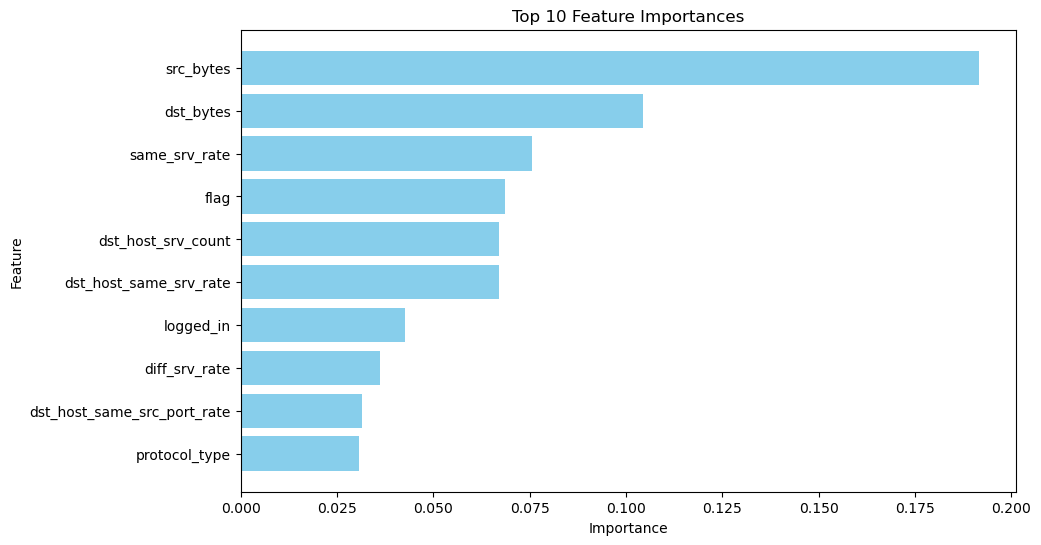

In [17]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'][:10], feature_importances['importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()


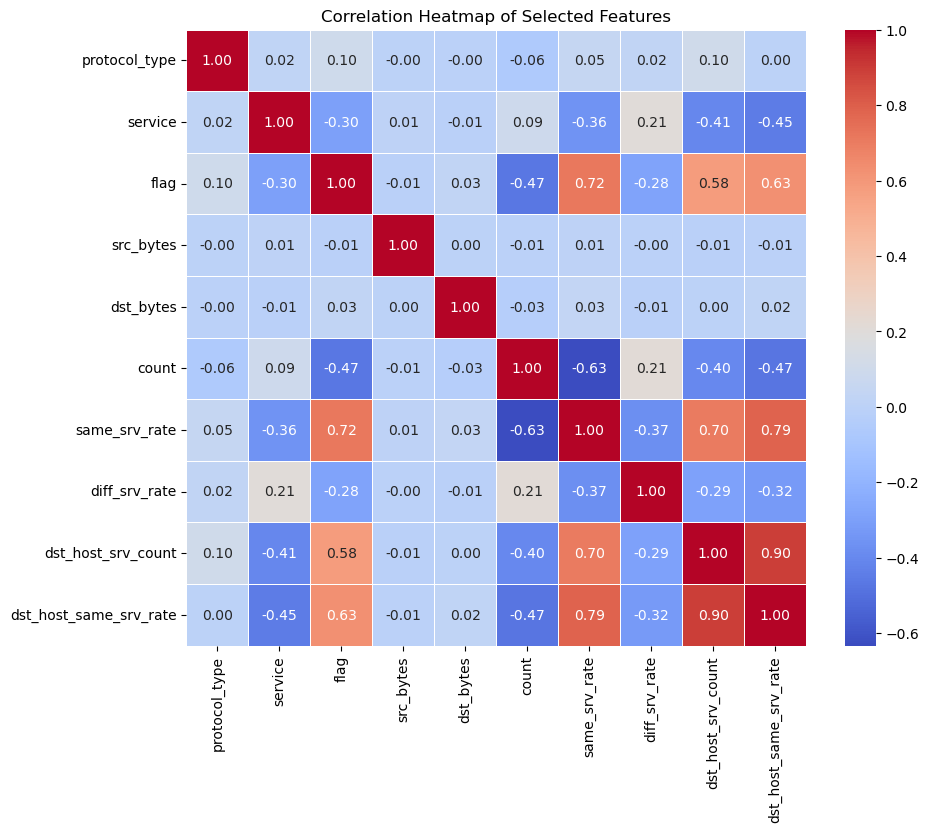

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with selected features
X_selected_df = pd.DataFrame(X_train_selected_rfe, columns=selected_features)

# Calculate the correlation matrix
corr_matrix = X_selected_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


# CNN

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assume X and y have already been defined and preprocessed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use RFE to select features
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Transform the dataset
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Reshape data for CNN (e.g., assuming 1D CNN input shape)
X_train_selected = X_train_selected.reshape(X_train_selected.shape[0], X_train_selected.shape[1], 1)
X_test_selected = X_test_selected.reshape(X_test_selected.shape[0], X_test_selected.shape[1], 1)


Building a CNN model

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_selected.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


C:\Users\Dell\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 8, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 2, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,601 (162.50 KB)

 Trainable params: 41,601 (162.50 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train the model
history = model.fit(X_train_selected, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_selected, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch 1/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8637 - loss: 0.3184 - val_accuracy: 0.9402 - val_loss: 0.1572
Epoch 2/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9456 - loss: 0.1526 - val_accuracy: 0.9491 - val_loss: 0.1526
Epoch 3/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9554 - loss: 0.1365 - val_accuracy: 0.9566 - val_loss: 0.1295
Epoch 4/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9583 - loss: 0.1290 - val_accuracy: 0.9566 - val_loss: 0.1321
Epoch 5/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9615 - loss: 0.1189 - val_accuracy: 0.9583 - val_loss: 0.1222
Epoch 6/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9634 - loss: 0.1125 - val_accuracy: 0.9586 - val_loss: 0.1238
Epoch 7/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9634 - loss: 0.1062 - val_accuracy: 0.9568 - val_loss: 0.1276
Epoch 8/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9644 - loss: 0.1071 - val_accuracy: 0.

In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_pred_prob = model.predict(X_test_selected)

# Convert predicted probabilities to binary labels (0 or 1) based on a threshold
y_pred = (y_pred_prob > 0.5).astype(int)

# Convert one-hot encoded labels back to categorical labels if needed
# If y_test is one-hot encoded, convert it to categorical labels
if len(y_test.shape) > 1:
    y_test = np.argmax(y_test, axis=1)

# Construct confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Confusion Matrix:
[[2281   84]
 [  43 2631]]


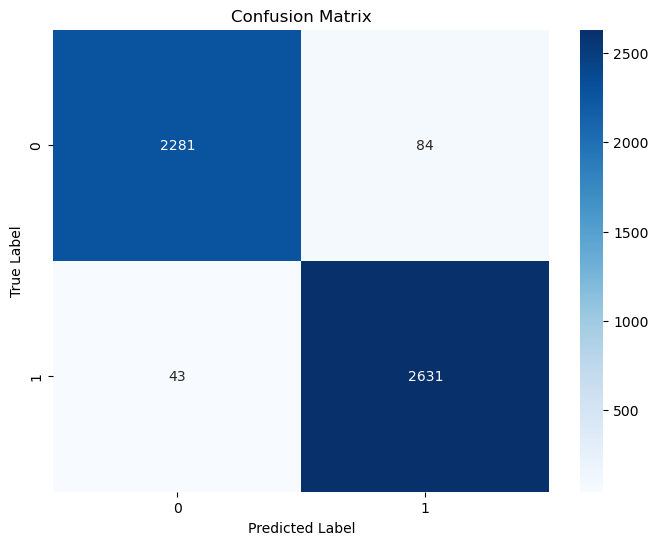

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Original Sample Input (before any preprocessing):
duration                              0
protocol_type                       tcp
service                        ftp_data
flag                                 SF
src_bytes                           491
dst_bytes                             0
land                                  0
wrong_fragment                        0
urgent                                0
hot                                   0
num_failed_logins                     0
logged_in                             0
num_compromised                       0
root_shell                            0
su_attempted                          0
num_root                              0
num_file_creations                    0
num_shells                            0
num_access_files                      0
num_outbound_cmds                     0
is_host_login                         0
is_guest_login                        0
count                                 2
srv_count                     

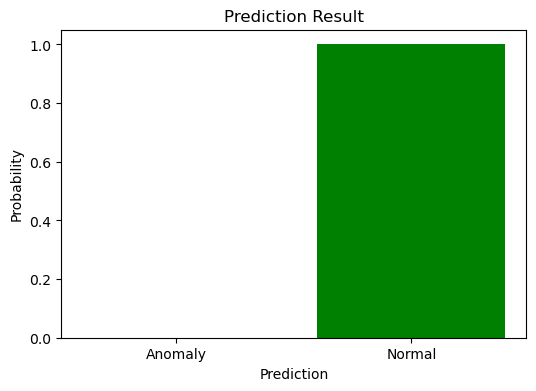

In [24]:
# Select the sample index
sample_index = 0 # You can choose any index you want to inspect

# Retrieve the original sample input before any transformations
original_sample_input = data.iloc[sample_index]

# Print the original sample input for verification
print("Original Sample Input (before any preprocessing):")
print(original_sample_input)

# Select a sample input from the preprocessed test set
sample_input_preprocessed = X_test_selected[sample_index].reshape(1, X_test_selected.shape[1], 1)  # Reshape to match the model input shape

# Use the trained model to make a prediction on the sample input
prediction = model.predict(sample_input_preprocessed)

# Decode the prediction
predicted_class = 'normal' if prediction < 0.5 else 'anomaly'

# Print the prediction
print(f'Prediction: {predicted_class}')

import matplotlib.pyplot as plt

# Define colors based on prediction
color = 'red' if predicted_class == 'anomaly' else 'green'

# Plot the bar
plt.figure(figsize=(6, 4))
plt.bar(['Anomaly', 'Normal'], [1 if predicted_class == 'anomaly' else 0, 1 if predicted_class == 'normal' else 0], color=color)
plt.xlabel('Prediction')
plt.ylabel('Probability')
plt.title('Prediction Result')
plt.show()


Original Sample Input (before any preprocessing):
duration                             0
protocol_type                      tcp
service                        private
flag                                S0
src_bytes                            0
dst_bytes                            0
land                                 0
wrong_fragment                       0
urgent                               0
hot                                  0
num_failed_logins                    0
logged_in                            0
num_compromised                      0
root_shell                           0
su_attempted                         0
num_root                             0
num_file_creations                   0
num_shells                           0
num_access_files                     0
num_outbound_cmds                    0
is_host_login                        0
is_guest_login                       0
count                              166
srv_count                            9
serror_rate   

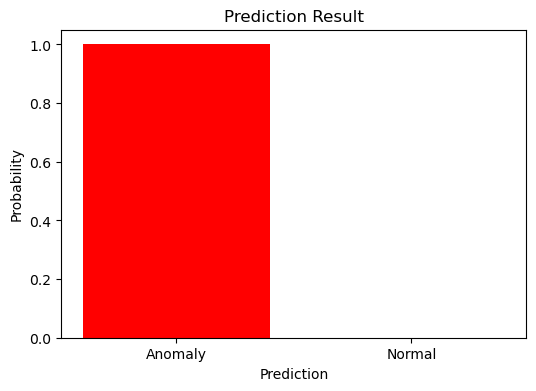

In [25]:
# Ensure the sample index is within the range of your dataset
sample_index = 6  # Make sure this index is valid

# Retrieve the original sample input before any transformations
original_sample_input = data.iloc[sample_index]

# Print the original sample input for verification
print("Original Sample Input (before any preprocessing):")
print(original_sample_input)

# Select a sample input from the preprocessed test set
sample_input_preprocessed = X_test_selected[sample_index].reshape(1, X_test_selected.shape[1], 1)  # Reshape to match the model input shape

# Use the trained model to make a prediction on the sample input
prediction = model.predict(sample_input_preprocessed)

# Since prediction is a probability, we can classify it
predicted_class = 'normal' if prediction < 0.5 else 'anomaly'

# Print the prediction
print(f'Prediction: {predicted_class}')

# Plot the prediction result
import matplotlib.pyplot as plt

# Define colors based on prediction
color = 'red' if predicted_class == 'anomaly' else 'green'

# Plot the bar
plt.figure(figsize=(6, 4))
plt.bar(['Anomaly', 'Normal'], [1 if predicted_class == 'anomaly' else 0, 1 if predicted_class == 'normal' else 0], color=color)
plt.xlabel('Prediction')
plt.ylabel('Probability')
plt.title('Prediction Result')
plt.show()
